# Independence

$L_1 \succ L_2$ implies that $$ u(50) > 0.01 u(0) + 0.1 u(250) + 0.89 u(50)$$ or $$ u(50)>\frac{1}{11}u(0) + \frac{10}{11}u(250)$$

while $L_4 \succ L_3$ implies that $$ 0.9 u(0) + 0.1 u(250) > 0.11u(50) + 0.89 u(0) $$ or $$ u(50) < \frac{1}{11} u(0) + \frac{10}{11}u(250) $$
which is a contradiction (there is no $u()$ such that this could be true). 

# Demand for Insurance

## How much coverage

Expected utility is $$ EU(q) = p u(w-L - \pi q + q) + (1-p) u(w-\pi q) $$

He will choose $q$ to maximize $EU(q)$. The FOC is  $$ p u'(w_1)(1-\pi) - (1-p) u'(w_0)\pi = 0$$ where $w_1 = w-L-\pi q + q$ is wealth is the loss state and $w_0 = w- \pi q$. 

1. If $\pi = p$, then FOC becomes $u'(w_1) = u'(w_0)$ which implies $w_1=w_0$ and therefore $q^*=L$. 
2. If $\pi>p$, FOC rewritten  $$ \frac{u'(w_1)}{u'(w_0)} = \frac{1-p}{p}\frac{\pi}{1-\pi} $$. The RHS is greater than 1 if $\pi>p$ and therefore since $u'(w_1)>u'(w_0)$ if $w_1<w_0$, $q^*<L$. 



## Numerical exercise

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import minimize_scalar

In [2]:
gamma = 2
wi = 100e3
p = 0.05
L = 10e3
pis = np.linspace(p,1.5*p,10)

In [3]:
def crra(wealth,gamma):
    if gamma!=1.0:
        return wealth**(1.0-gamma)/(1.0-gamma)
    else :
        return np.log(wealth)
def eu(q,wi,p,L,pi,gamma):
    # define wealth in both states
    w0 = wi - pi*q
    w1 = wi - L - pi*q + q
    # compute utilities
    u0 = crra(w0,gamma)
    u1 = crra(w1,gamma)
    # expected utility
    value = p*u1 + (1.0-p)*u0
    return -value

In [4]:
opt = minimize_scalar(eu,bounds=(0.0,L),method='bounded',args=(wi,p,L,p,gamma))
opt.x

9999.995917954142

In [5]:
qopts = []
for pi in pis: 
    opt = minimize_scalar(eu,bounds=(0.0,L),method='bounded',args=(wi,p,L,pi,gamma))
    qopts.append(opt.x)


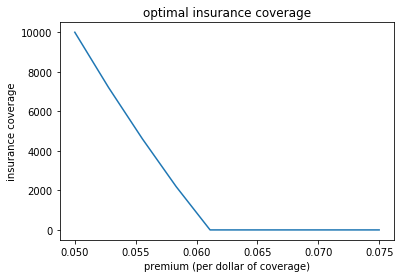

In [6]:
plt.figure()
plt.plot(pis,qopts)
plt.xlabel('premium (per dollar of coverage)')
plt.ylabel('insurance coverage')
plt.title('optimal insurance coverage')
plt.show()

Yes, this is the demand curve as a function of price! If there is competition in the market, then $\pi=p$ and we have full coverage. If the insurer is a monopoly, he can use the demand curve to charge a higher price. But demand is quite elastic. We can compute the elasticity, say at $\pi=p$. 

In [7]:
elast = (qopts[1]/qopts[0]-1.0)/(pis[1]/pis[0]-1.0)
elast

-5.037966329746766

Let's define a function that does that

In [8]:
def elast(wi,p,L,pi,gamma,eps=0.0025):
    # at pi
    opt = minimize_scalar(eu,bounds=(0.0,L),method='bounded',args=(wi,p,L,pi,gamma))
    q0 = opt.x
    # at pi + eps
    opt = minimize_scalar(eu,bounds=(0.0,L),method='bounded',args=(wi,p,L,pi+eps,gamma))
    q1 = opt.x
    return (q1/q0-1.0)/(eps/p)
    

In [9]:
elast(wi,p,L,p,gamma)

-5.057048195661333

Now do this as function of parameters

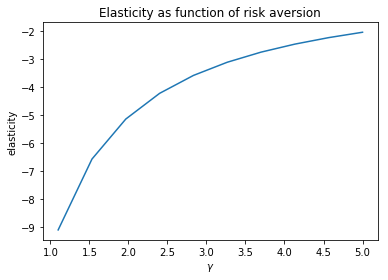

In [10]:
gammas = np.linspace(1.1,5.0,10)
etas = [elast(wi,p,L,p,gamma) for gamma in gammas]
plt.figure()
plt.plot(gammas,etas)
plt.xlabel('$\\gamma$')
plt.ylabel('elasticity')
plt.title('Elasticity as function of risk aversion')
plt.show()

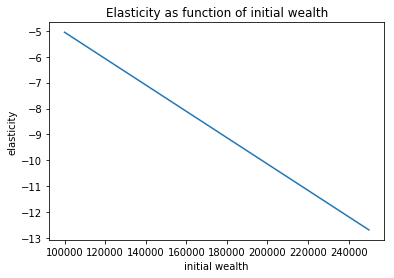

In [11]:
wis = np.linspace(100e3,250e3,10)
etas = [elast(wi,p,L,p,gamma) for wi in wis]
plt.figure()
plt.plot(wis,etas)
plt.xlabel('initial wealth')
plt.ylabel('elasticity')
plt.title('Elasticity as function of initial wealth')
plt.show()

# Portfolio Problem

## Theory

Expected utility is given by $$EU(q) = \int u(w+q \tilde{z} + (w-q)r)dG $$

The FOC of that problem is $$EU'(q^*) = \int u'(w+q^*\tilde{z} + (w-q^*)r)(\tilde{z}-r)dG $$

The second order condition is $$EU''(q^*) = \int u''(w+q^*\tilde{z} + (w-q^*)r)(\tilde{z}-r)^2dG<0 $$ for all $w$. Hence, need check if at $q=0$ and $E\tilde{z} = r$ $EU'(q^*)$ is positive, zero or negative.

$$EU'(0) = u'(w(1+r))\int (\tilde{z}-r)dG = u'(w(1+r))(E\tilde{z}-r) = 0 $$

Since $EU'(0)=0$ and $EU''(0)<0$, $q^* = 0$. When $E\tilde{z}>r$, the FOC tells us that $EU'(0)>0$, hence $q^*>0$. 

## Numerical Exercise

In [12]:
ns = 1000
sigz = 0.16
muz = 0.06
r = 0.02
wi = 100e3
gamma = 2.0
eps = np.random.normal(size=ns)

In [13]:
def eu(q,gamma,wi,r,muz,sigz,eps):
    rz = muz + sigz*eps
    eu = np.mean([crra(wi+q*z + (wi-q)*r,gamma) for z in rz])
    return -eu


2) To find out how much he will invest: 

In [14]:
opt = minimize_scalar(eu,bounds=(0.0,wi),method='bounded',args=(gamma,wi,r,muz,sigz,eps))
opt.x

84014.34895962074

He puts most of his wealth in the risky asset. 

3) To see how that varies with parameters, do something like what is below: 

In [15]:
qopts = []
muzs = np.linspace(0,0.06,10)
for muz in muzs: 
    opt = minimize_scalar(eu,bounds=(0.0,wi),method='bounded',args=(gamma,wi,r,muz,sigz,eps))
    qopts.append(opt.x)

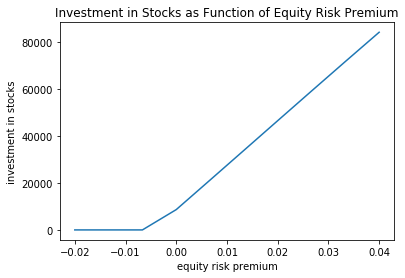

In [16]:
plt.figure()
plt.plot(muzs-r,qopts)
plt.xlabel('equity risk premium')
plt.ylabel('investment in stocks')
plt.title('Investment in Stocks as Function of Equity Risk Premium')
plt.show()

4) To back out their risk aversion, we can do it by inverting the function using observed data... We know how to solve for $q$ for a given $\gamma$. If we know $q$, find the $\gamma$ such that $q^*$ is equal to the one from data (brothers)

In [17]:
def solve(gamma,wi,r,muz,sigz,eps,qdata):
    opt = minimize_scalar(eu,bounds=(0.0,wi),method='bounded',args=(gamma,wi,r,muz,sigz,eps))
    return  qdata - opt.x


In [18]:
from scipy.optimize import brentq
sigz = 0.16
muz = 0.06
r = 0.02
wi = 100e3
gamma = 2.0
brothers = [0.25,0.5,0.75]
gammas = []
for bro in brothers: 
    gammas.append(brentq(solve,0.1,10.0,args=(wi,r,muz,sigz,eps,bro*wi)))
    

In [19]:
for b,g in zip(brothers,gammas):
    print(b,g) 

0.25 6.798461262368355
0.5 3.3910270812876973
0.75 2.247304634651713


In [20]:
gammas

[6.798461262368355, 3.3910270812876973, 2.247304634651713]

These are the relative risk aversion coefficients needed to rationalize their behavior. You have just done method of moment estimation without knowing it...